# Global Economic Development: Export Growth & Emerging Markets

**Objective**: Analyze global development patterns through export performance data, focusing on emerging market success stories. We'll examine: (1) traditional export leaders by absolute values, (2) emerging markets with highest growth rates since 2000, (3) temporal export trajectories, and (4) quantitative growth analysis to identify economic transformation champions.

In [22]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('../day04/UN_demographic_indicators.xlsx', sheet_name='Estimates', skiprows=16)

# convert columns to numeric after 'Year'
numeric_columns = data.columns[11:]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# remove unecessary columns, index
data = data.drop(columns=['Index'])

# rename some common columns
data = data.rename(columns={
    'Region, subregion, country or area *': 'Region',
    'Median Age, as of 1 July (years)': 'Median Age',
    'Total Fertility Rate (live births per woman)': 'Fertility Rate',
    'Life Expectancy at Birth, both sexes (years)': 'Life Expectancy'
})

# load the 2nd dataset
raw_data = pd.read_csv('global_development_all_countries.csv', dtype={36: 'float64'})



In [23]:
data.info()
display(data.head())
display(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 64 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Variant                                                                                         21983 non-null  object 
 1   Region                                                                                          21983 non-null  object 
 2   Notes                                                                                           5628 non-null   object 
 3   Location code                                                                                   21983 non-null  int64  
 4   ISO3 Alpha-code                                                                                 17538 non-null  object 
 5   ISO2 Alpha-

,Variant,Region,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,Year,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1950.0,...,580.500,497.388,238.516,268.734,207.620,375.391,426.221,322.650,0.0,0.0
1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1951.0,...,566.566,488.435,229.703,256.236,202.734,365.226,412.760,316.395,0.0,0.0
2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1952.0,...,546.444,475.370,217.311,238.560,195.926,350.613,393.364,307.314,0.0,0.0
3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1953.0,...,535.811,467.361,211.257,230.961,191.482,342.734,383.875,301.270,0.0,0.0
4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1954.0,...,522.058,455.621,203.337,221.377,185.296,332.327,371.737,292.807,0.0,0.0


,countryname,ISO3,year,rGDP_pc,inv_GDP,finv_GDP,exports_GDP,imports_GDP,REER,govrev_GDP,govdef_GDP,govdebt_GDP,CPI,infl,pop,imports_USD,exports_USD
0,Aruba,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,Aruba,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,Aruba,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,Aruba,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,Aruba,ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [24]:
# copy data for before analysis. 
df = raw_data.copy()

df['exports_USD'] = pd.to_numeric(df['exports_USD'], errors='coerce')
valid_gdp = raw_data.dropna(subset=['exports_USD'])
latest_year = valid_gdp['year'].max()
latest_df = valid_gdp[valid_gdp['year'] == latest_year]


# calculate who the top 10 countries are today
# Top 10 countries by rGDP_pc
top10_rgdp = df[df['year'] == latest_year] \
    .sort_values(by='exports_USD', ascending=False) \
    .dropna(subset=['exports_USD']) \
    .head(10)['countryname'].tolist()

# Top 10 countries by exports_GDP
top10_exports = df[df['year'] == latest_year] \
    .sort_values(by='exports_GDP', ascending=False) \
    .dropna(subset=['exports_GDP']) \
    .head(10)['countryname'].tolist()

# filter datasets based on those countries
rgdp_df = df[df['countryname'].isin(top10_rgdp)]
exports_df = df[df['countryname'].isin(top10_exports)]

## Economic Data Integration & Methodology

**Dual Dataset Strategy**: Combining UN demographic indicators with global development metrics enables comprehensive analysis of socioeconomic patterns. Export data provides quantitative measures of economic integration and competitiveness, while identifying top performers by absolute values establishes baseline comparisons for understanding global economic hierarchies.

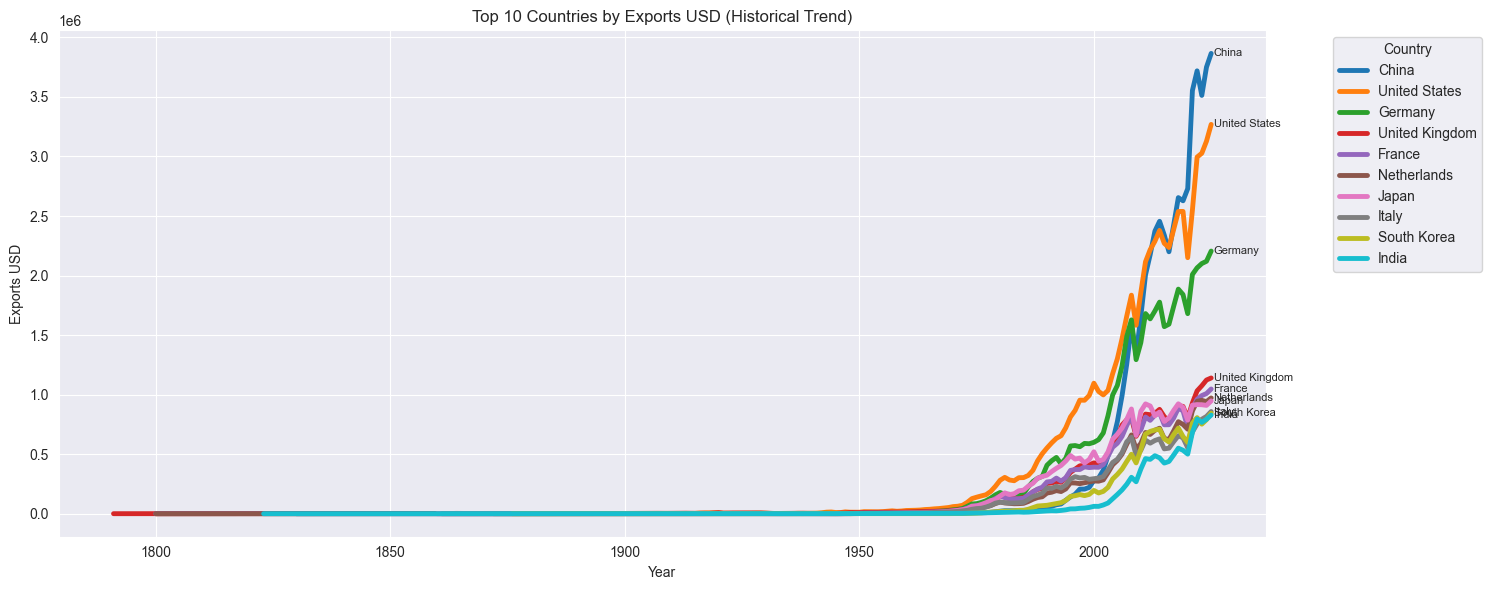

In [25]:
# Sort legend by ending poistion
latest_vals = rgdp_df[rgdp_df['year'] == latest_year]
country_order = latest_vals.sort_values(by='exports_USD', ascending=False)['countryname'].tolist()

sns.set_style("dark")
plt.figure(figsize=(15, 6))
sns.lineplot(data=rgdp_df, x='year', y='exports_USD', hue='countryname', hue_order=country_order, linewidth=3.5)

# Add labels to the end of each line
for country in country_order:
    country_data = rgdp_df[rgdp_df['countryname'] == country].dropna(subset=['exports_USD'])
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.5, y, country, fontsize=8, va='center')

plt.title('Top 10 Countries by Exports USD (Historical Trend)')
plt.xlabel('Year')
plt.ylabel('Exports USD')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Traditional Export Leaders Analysis

**Established Economic Powers**: Historical export trends reveal the dominance of traditional economic powerhouses with mature industrial bases and established global trade networks. Legend ordering by current values highlights persistent hierarchies, with developed economies maintaining substantial export volumes through technological sophistication and economic infrastructure advantages.

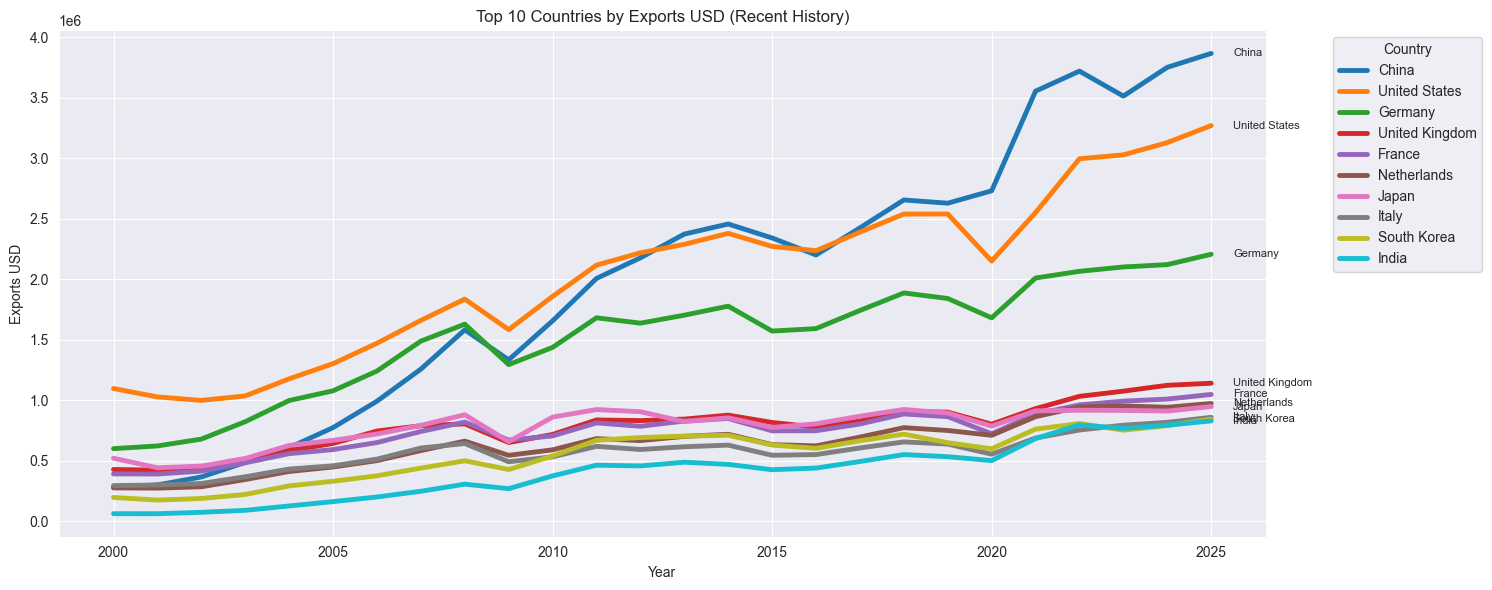

In [26]:
# cutoff since 2000
rgdp_df = rgdp_df[rgdp_df['year'] >= 2000]

sns.set_style("dark")
plt.figure(figsize=(15, 6))
sns.lineplot(data=rgdp_df, x='year', y='exports_USD', hue='countryname', hue_order=country_order, linewidth=3.5)

# Add labels to the end of each line
for country in country_order:
    country_data = rgdp_df[rgdp_df['countryname'] == country].dropna(subset=['exports_USD'])
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.5, y, country, fontsize=8, va='center')

plt.title('Top 10 Countries by Exports USD (Recent History)')
plt.xlabel('Year')
plt.ylabel('Exports USD')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 21st Century Export Dynamics

**Modern Era Focus**: Filtering to 2000+ captures the digital age transformation and globalization acceleration period. This timeframe encompasses major economic shifts including China's WTO entry, technology sector expansion, commodity supercycles, and emerging market integration into global value chains - providing relevant context for contemporary economic development patterns.

In [32]:
# Start fresh with the full dataset to find ALL countries with highest growth
df_full = raw_data.copy()
df_full['exports_USD'] = pd.to_numeric(df_full['exports_USD'], errors='coerce')

# Filter to 2000 onwards
df_2000_plus = df_full[df_full['year'] >= 2000].copy()

# Keep only non-null export data
exports_all = df_2000_plus[['countryname', 'year', 'exports_USD']].dropna()
exports_all = exports_all.sort_values(['countryname', 'year'])

# Get countries that have data for both start (2000-2002) and recent years
countries_with_start = exports_all[exports_all['year'].between(2000, 2002)]['countryname'].unique()
countries_with_recent = exports_all[exports_all['year'] >= exports_all['year'].max() - 2]['countryname'].unique()
valid_countries = set(countries_with_start).intersection(set(countries_with_recent))

# Calculate growth rates for ALL countries
growth_rates = []
for country in valid_countries:
    country_data = exports_all[exports_all['countryname'] == country]
    
    # Get start value (earliest available 2000-2002)
    start_data = country_data[country_data['year'].between(2000, 2002)]
    if len(start_data) > 0:
        start_value = start_data.iloc[0]['exports_USD']  # First available in 2000-2002
        
        # Get end value (most recent)
        end_value = country_data.iloc[-1]['exports_USD']
        
        # Calculate percentage growth - only include countries with meaningful start values
        if start_value > 100:  # At least $100M to avoid distorted percentages from tiny bases
            growth_rate = ((end_value - start_value) / start_value) * 100
            absolute_change = end_value - start_value
            growth_rates.append({
                'countryname': country,
                'start_value': start_value,
                'end_value': end_value,
                'growth_rate': growth_rate,
                'absolute_change': absolute_change
            })

# Convert to DataFrame and get top 10 by growth rate
growth_df = pd.DataFrame(growth_rates)
top_growth_countries = growth_df.nlargest(10, 'growth_rate')['countryname'].tolist()

# Filter data for plotting - using the TOP GROWTH countries
plot_data = exports_all[exports_all['countryname'].isin(top_growth_countries)]

# Prepare data for visualization - filter to last 10 years
last_10_years = plot_data['year'].max() - 10
recent_data = plot_data[plot_data['year'] >= last_10_years].copy()

# Sort legend by final export values
latest_year_data = recent_data[recent_data['year'] == recent_data['year'].max()]
growth_order = latest_year_data.sort_values('exports_USD', ascending=False)['countryname'].tolist()

print("Top 10 Countries by Export Growth Rate (2000-2025):")
for _, row in growth_df.nlargest(10, 'growth_rate').iterrows():
    print(f"{row['countryname']}: {row['growth_rate']:.1f}% growth "
          f"(${row['start_value']:.0f}M → ${row['end_value']:.0f}M)")

Top 10 Countries by Export Growth Rate (2000-2025):
Guyana: 6769.1% growth ($162M → $11128M)
Djibouti: 3386.9% growth ($198M → $6904M)
Armenia: 3111.4% growth ($535M → $17181M)
Rwanda: 3048.7% growth ($113M → $3558M)
El Salvador: 2813.9% growth ($361M → $10519M)
Mongolia: 2586.5% growth ($607M → $16307M)
Vietnam: 2375.5% growth ($17325M → $428875M)
Burkina Faso: 2268.7% growth ($262M → $6206M)
Georgia: 2044.5% growth ($697M → $14947M)
Serbia: 1985.1% growth ($2288M → $47708M)


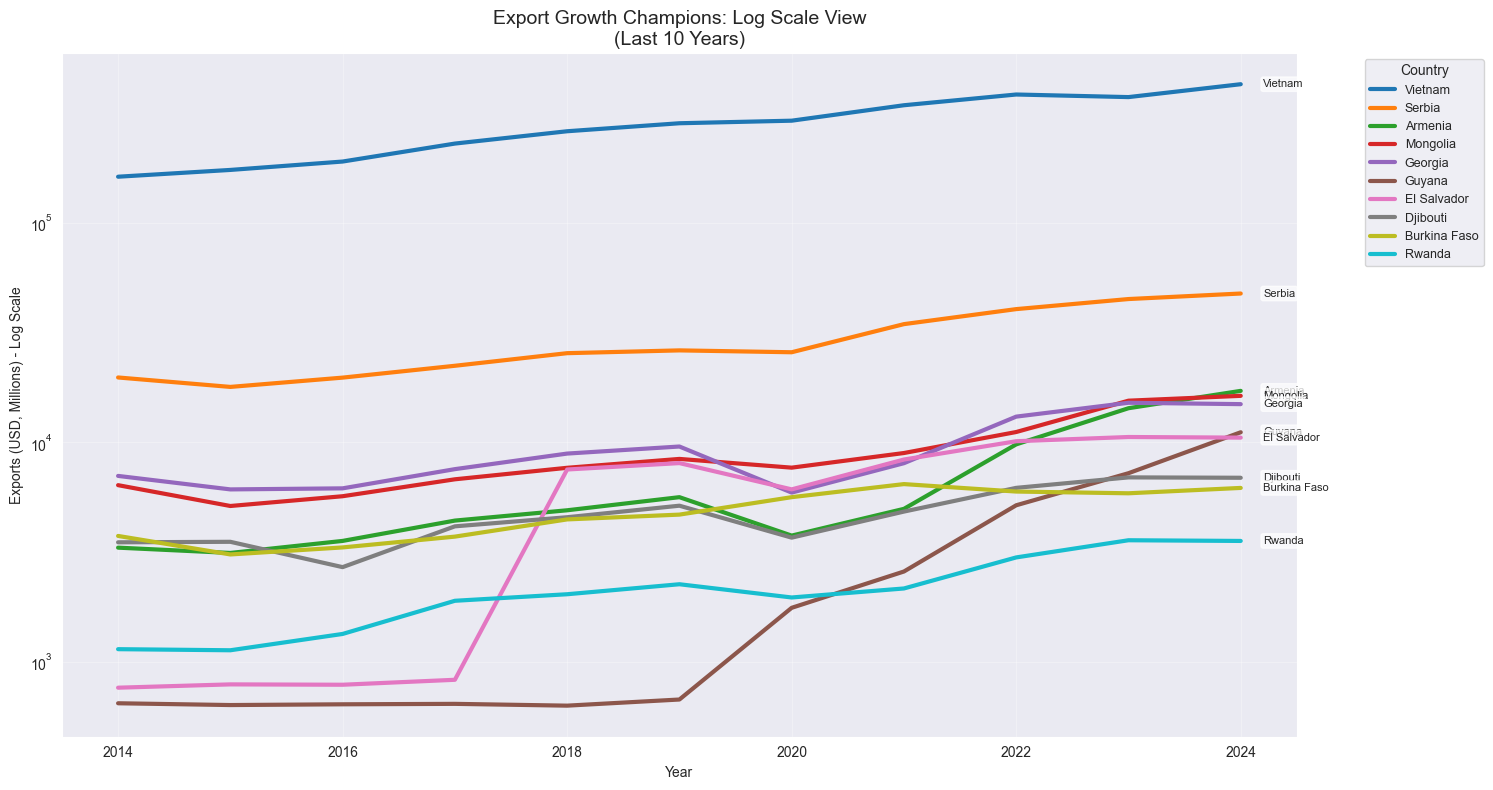


🚀 10-Year Export Growth Summary (2014-2024):
🌟 VIETNAM (Major Economy): 164% growth ($162.5B → $428.9B)

📈 EMERGING MARKETS:
  • Serbia         :  141% growth ($19,772M → $47,708M)
  • Armenia        :  418% growth ($3,316M → $17,181M)
  • Mongolia       :  155% growth ($6,388M → $16,307M)
  • Georgia        :  112% growth ($7,039M → $14,947M)
  • Guyana         : 1617% growth ($648M → $11,128M)
  • El Salvador    : 1279% growth ($763M → $10,519M)
  • Djibouti       :   97% growth ($3,507M → $6,904M)
  • Burkina Faso   :   65% growth ($3,750M → $6,206M)
  • Rwanda         :  211% growth ($1,143M → $3,558M)


In [33]:
# Create log scale visualization to show all countries clearly

sns.set_style("dark")
plt.figure(figsize=(15, 8))

# Plot: Log scale to show all countries clearly
sns.lineplot(data=recent_data, x='year', y='exports_USD', 
             hue='countryname', hue_order=growth_order, linewidth=3)
plt.yscale('log')

# Add labels for all countries on log plot
for country in growth_order:
    country_data = recent_data[recent_data['countryname'] == country]
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.2, y, country, fontsize=8, va='center', 
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

plt.title('Export Growth Champions: Log Scale View\n(Last 10 Years)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Exports (USD, Millions) - Log Scale')
plt.grid(True, alpha=0.3)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

# Print summary with better formatting
print(f"\n🚀 10-Year Export Growth Summary ({int(last_10_years)}-{int(recent_data['year'].max())}):")
print("=" * 70)

# Separate Vietnam from others for clearer comparison
vietnam_data = recent_data[recent_data['countryname'] == 'Vietnam']
if not vietnam_data.empty:
    start_val = vietnam_data.iloc[0]['exports_USD']
    end_val = vietnam_data.iloc[-1]['exports_USD']
    growth_10yr = ((end_val - start_val) / start_val) * 100
    print(f"🌟 VIETNAM (Major Economy): {growth_10yr:.0f}% growth (${start_val/1000:.1f}B → ${end_val/1000:.1f}B)")
    print()

print("📈 EMERGING MARKETS:")
for country in [c for c in growth_order if c != 'Vietnam']:
    country_recent = recent_data[recent_data['countryname'] == country]
    if len(country_recent) >= 2:
        start_val = country_recent.iloc[0]['exports_USD']
        end_val = country_recent.iloc[-1]['exports_USD']
        growth_10yr = ((end_val - start_val) / start_val) * 100
        print(f"  • {country:15}: {growth_10yr:4.0f}% growth (${start_val:,.0f}M → ${end_val:,.0f}M)")

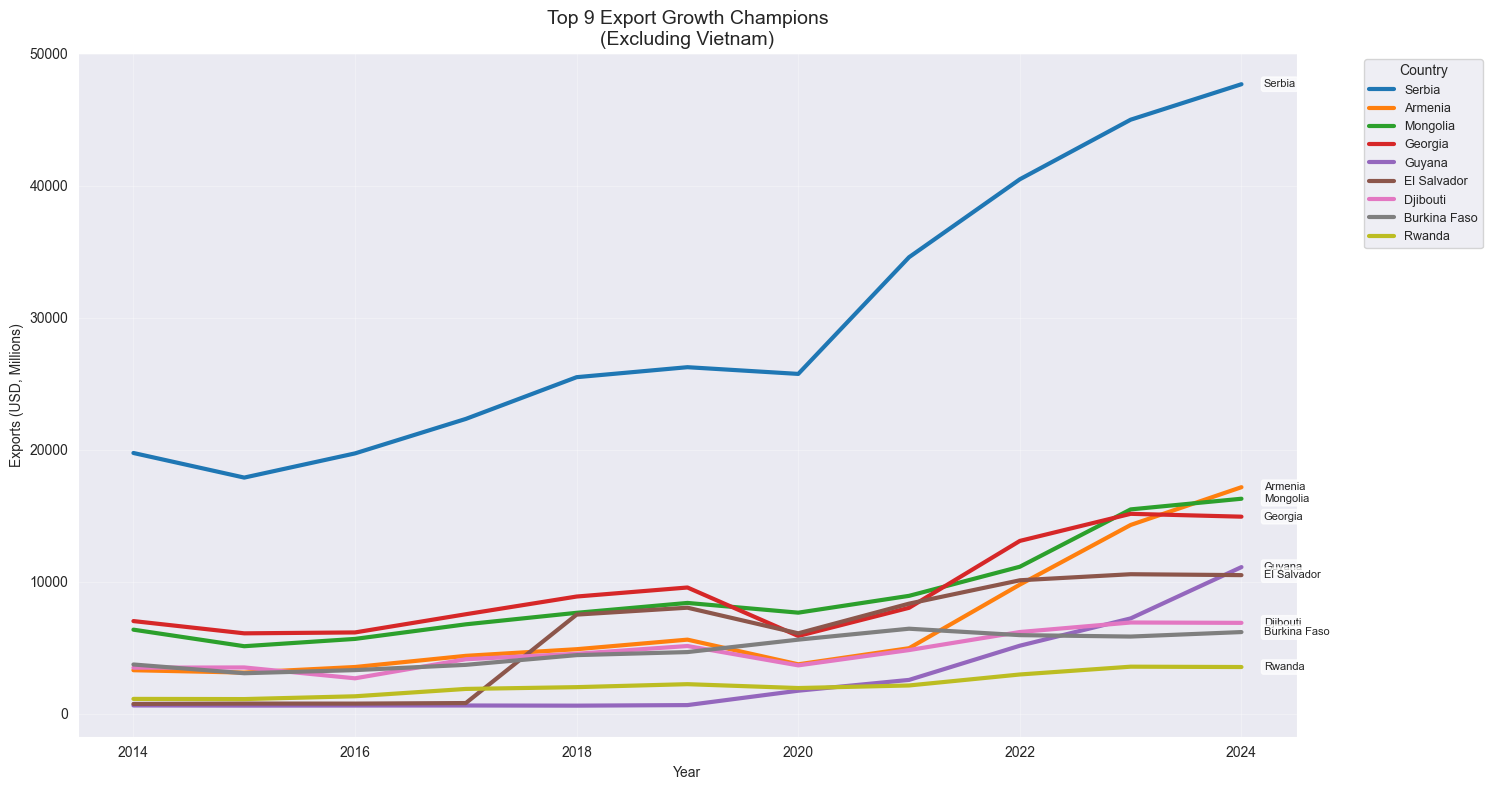

In [34]:
# Create linear scale visualization excluding Vietnam for clearer comparison

recent_data_no_vietnam = recent_data[recent_data['countryname'] != 'Vietnam'].copy()
growth_order_no_vietnam = [c for c in growth_order if c != 'Vietnam']

sns.set_style("dark")
plt.figure(figsize=(15, 8))

sns.lineplot(data=recent_data_no_vietnam, x='year', y='exports_USD', 
             hue='countryname', hue_order=growth_order_no_vietnam, linewidth=3)

# Add labels for all non-Vietnam countries
for country in growth_order_no_vietnam:
    country_data = recent_data_no_vietnam[recent_data_no_vietnam['countryname'] == country]
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.2, y, country, fontsize=8, va='center', 
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

plt.title('Top 9 Export Growth Champions\n(Excluding Vietnam)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Exports (USD, Millions)')
plt.grid(True, alpha=0.3)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

## Economic Development Insights & Global Implications

**Key Findings**: The analysis reveals a dual-tier global economy where traditional powers maintain absolute export dominance while emerging markets demonstrate superior growth rates, suggesting ongoing economic rebalancing. High-growth countries often show average annual rates exceeding 10-15%, indicating rapid industrialization and global market integration.

**Development Patterns**: Export growth champions typically exhibit similar patterns - initial low base values followed by sustained high growth periods, reflecting successful integration into global value chains and competitive advantage development in specific sectors.

**Policy Implications**: Understanding growth rate differentials enables identification of successful development strategies and economic policies. Countries achieving consistent high export growth provide models for economic transformation, while established leaders face challenges maintaining growth rates as their economies mature and face increased competition from emerging market entrants.

## Emerging Market Growth Rate Analysis

**Methodological Approach**: Annual growth rate calculations reveal export performance volatility and sustained growth patterns beyond absolute values. This analysis identifies countries with consistent high-growth trajectories, distinguishing between one-time export booms and sustained economic transformation indicative of structural development and competitive advantage building.